# Decision Tree Regression

## Best video to understand DTR: https://www.youtube.com/watch?v=g9c66TUylZ4

## Intuition

X1 and X2 are independent variables, dependant variable Y is in 3rd dimension
<br>
Without Regression Tree: If we want to predict Y, we'd simply take average of all Y's and choose that
<br>
With Regression Tree: We take average Y, based on all X's in a certain cluster where the new point falls
<br>
The algorithm forms the clusters for us by doing the auto-splits
<br>
<b>DTR Algorithm is not the best fit for only one independant variable. It is more suited to multiple independant variables</b>

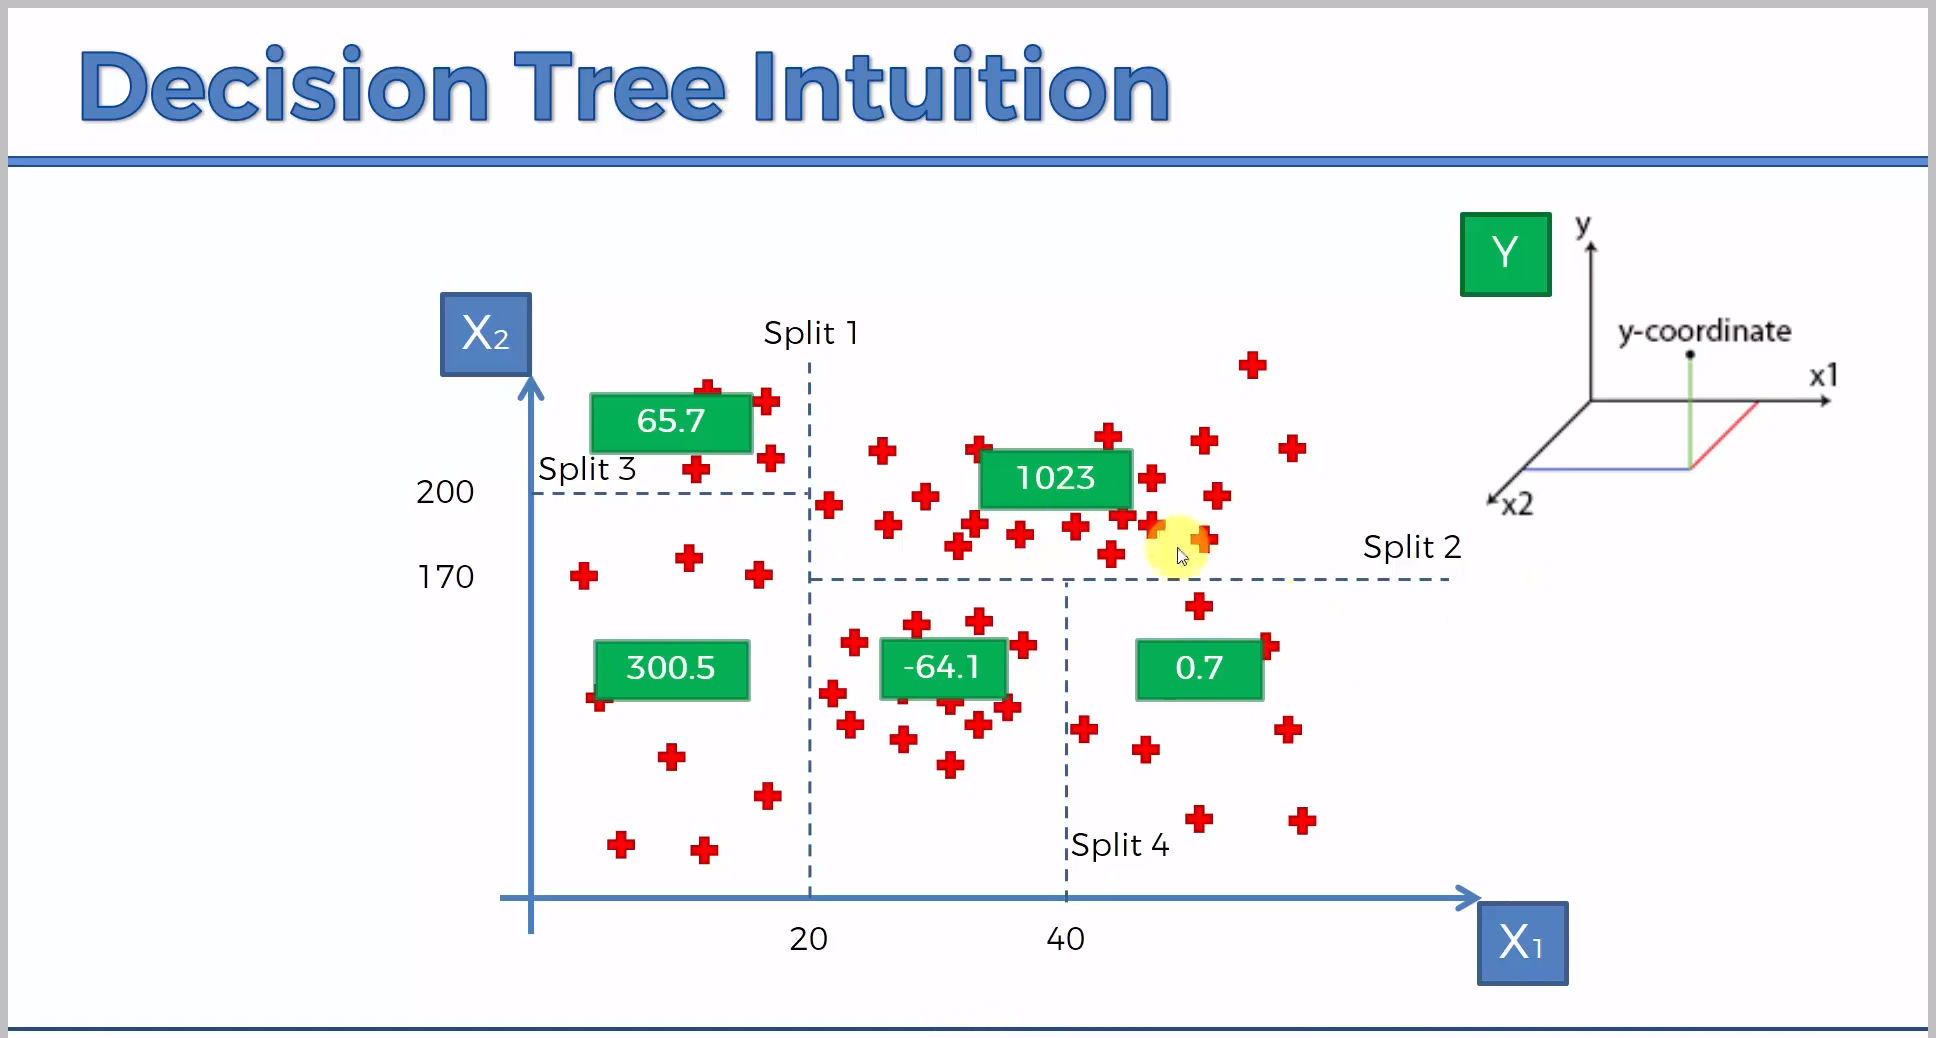

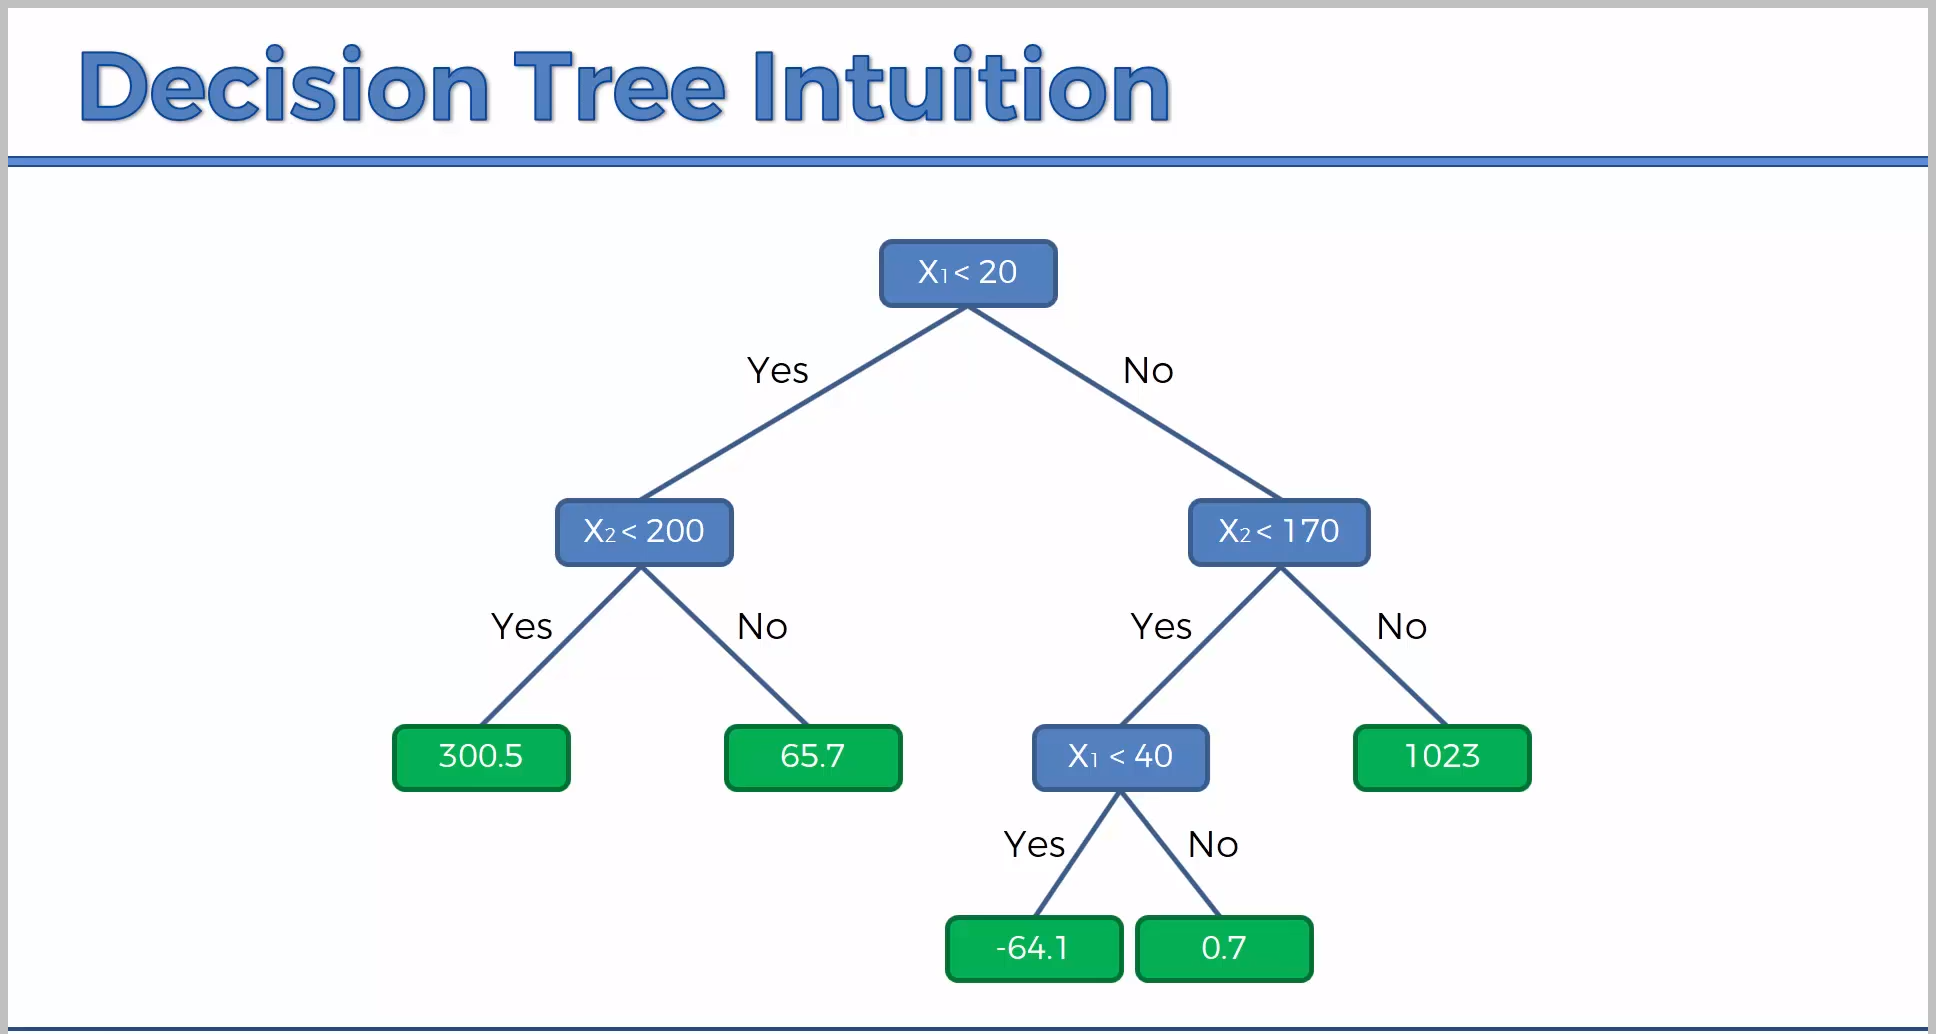

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

We don't need feature scaling for decision tree regression

In [4]:
from sklearn.tree import DecisionTreeRegressor #tree module of scikit learn: DecisionTreeRegressor class
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y) #Train the regressor to understand correlations between position level & salaries

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting a new result

In [5]:
regressor.predict([[6.5]])

array([150000.])

The model has predicted that this person with 6.5 year work ex must have 150000 as salary in his organisation

## Visualising the Decision Tree Regression results (higher resolution)

In [9]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

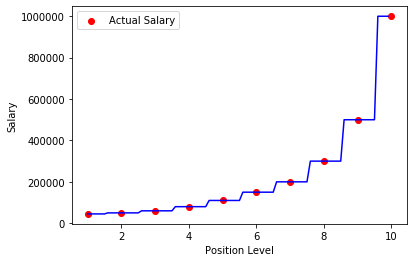

In [19]:
plt.scatter(X, Y, color = 'red', label = 'Actual Salary')
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.title("")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()

What is this weird graph?

What it's doing is that it's taking a data point(salary) and predicting the same salary for that (point - 4.5) and that (point + 4.5)

Intuition: Decision Trees work by splitting the data through successive nodes so at end, you get different ranges of features where prediction is same
<br>
One horizontal line is one range

When a model fits the training data perfectly, it probably means it is overfit and will not perform well with new data.
In ML Lingo this is <b> model has NO BIAS BUT POTENTIALLY LARGE VARIANCE </b>

How to prevent the tree from overfitting the training data?
<br>
Split the observations when there are more than some minimum number(Watch the Josh Stats Video)

#### Decision Tree Regression is not best adapted to only 1 feature data sets. It's more suited to having multiple features in the data alongside the dependant variable